<a href="https://colab.research.google.com/github/NishizawaIzuru/GCI-/blob/main/last_task_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#notebookを置いてあるディレクトリを指定
%cd "/content/drive/MyDrive/Colab Notebooks/GCI_2022_Winter/Last_task/"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/GCI_2022_Winter/Last_task


In [ ]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#ClientとRecordのcsvデータのチェック
client = pd.read_csv("Client.csv")
record = pd.read_csv("Record.csv")

In [ ]:
client.head()

In [ ]:
record.head()

In [ ]:
client.corr()

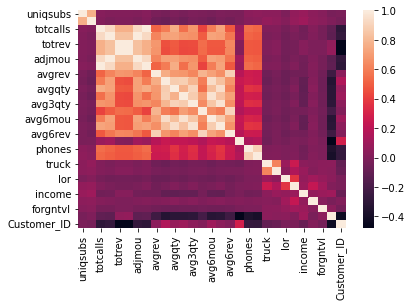

In [ ]:
sns.heatmap(client.corr())

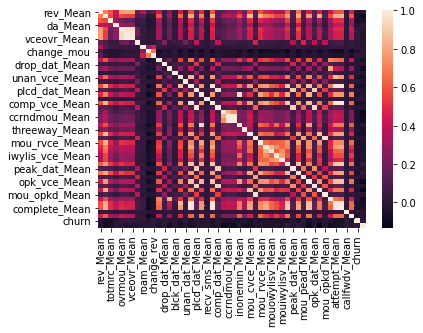

In [ ]:
sns.heatmap(record.corr())

In [ ]:
record.isnull().sum()

rev_Mean           357
mou_Mean           357
totmrc_Mean        357
da_Mean            357
ovrmou_Mean        357
ovrrev_Mean        357
vceovr_Mean        357
datovr_Mean        357
roam_Mean          357
change_mou         891
change_rev         891
drop_vce_Mean        0
drop_dat_Mean        0
blck_vce_Mean        0
blck_dat_Mean        0
unan_vce_Mean        0
unan_dat_Mean        0
plcd_vce_Mean        0
plcd_dat_Mean        0
recv_vce_Mean        0
recv_sms_Mean        0
comp_vce_Mean        0
comp_dat_Mean        0
custcare_Mean        0
ccrndmou_Mean        0
cc_mou_Mean          0
inonemin_Mean        0
threeway_Mean        0
mou_cvce_Mean        0
mou_cdat_Mean        0
mou_rvce_Mean        0
owylis_vce_Mean      0
mouowylisv_Mean      0
iwylis_vce_Mean      0
mouiwylisv_Mean      0
peak_vce_Mean        0
peak_dat_Mean        0
mou_peav_Mean        0
mou_pead_Mean        0
opk_vce_Mean         0
opk_dat_Mean         0
mou_opkv_Mean        0
mou_opkd_Mean        0
drop_blk_Me

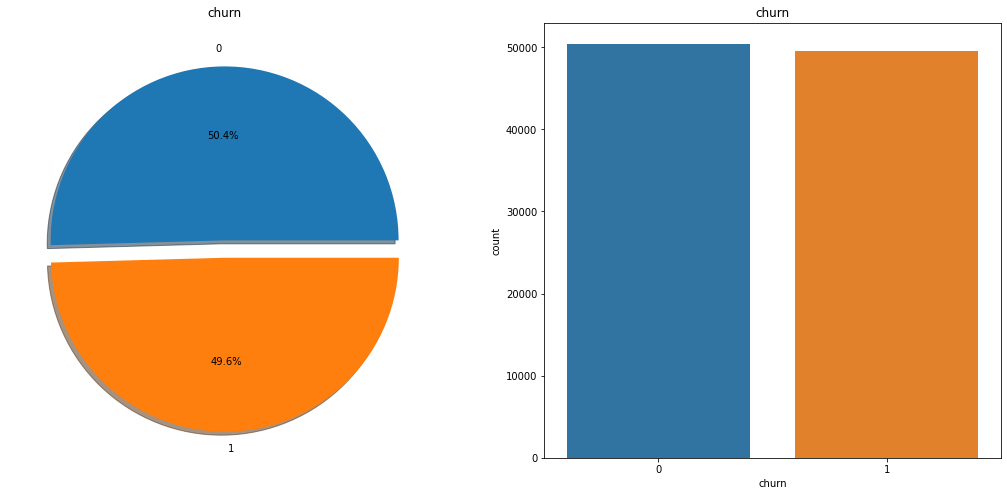

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
record['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('churn')
ax[0].set_ylabel('')
sns.countplot('churn',data=record,ax=ax[1])
ax[1].set_title('churn')
plt.show()
#1:解約した人、0:解約してない人　均衡データっぽいで

In [ ]:
#LightGBMでどのような特微量がchurnに関連しているか調べる。
record.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months'],
      dtype='object')

In [ ]:
categ_nominal = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months']

In [ ]:
for i in categ_nominal:
  record = pd.concat([record, pd.get_dummies(record[i], prefix=i, dummy_na=True)], sort=False, axis=1)
record = record.drop(categ_nominal, axis=1)
record.info()

In [ ]:
#clientとrecordの結合
df1 = pd.concat([record, client], axis = 1)

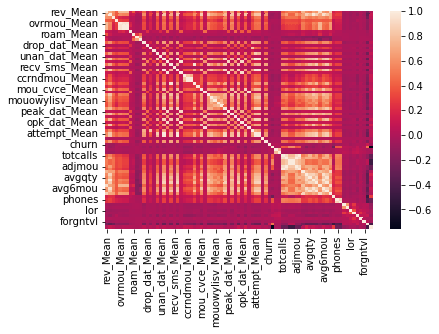

In [ ]:
sns.heatmap(df1.corr())

In [ ]:
df1[threeway_Mean]

NameError: ignored

In [ ]:
df1.head(10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.00,0.00,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.10,9.10,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.00,0.00,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.00,0.00,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,82.2750,1312.25,75.000,1.2375,0.00,0.00,0.00,0.0,0.0,156.75,...,0.0,U,U,U,U,U,U,Y,458.0,1000006
6,17.1450,0.00,16.990,0.0000,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,N,U,U,U,U,U,Y,852.0,1000007
7,38.0525,682.50,52.490,0.2475,0.00,0.00,0.00,0.0,0.0,147.50,...,1.0,S,U,U,U,U,U,Y,231.0,1000008
8,97.3375,1039.00,50.000,4.9500,419.50,41.95,41.95,0.0,0.0,198.00,...,0.0,F,U,U,U,U,U,N,700.0,1000009
9,31.6625,25.50,29.990,0.2475,0.00,0.00,0.00,0.0,0.0,59.50,...,1.0,N,U,U,U,U,U,Y,601.0,1000010


In [ ]:
df1.info()

NameError: ignored

In [ ]:
df1.corr()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
rev_Mean,1.000000,0.706029,0.602148,0.403806,0.772117,0.776647,0.772159,0.152664,0.374718,0.075835,...,0.225320,-0.035863,-0.010322,-0.056251,-0.033564,-0.040699,0.001509,-0.038434,-0.213402,0.009748
mou_Mean,0.706029,1.000000,0.575567,0.394583,0.575611,0.541250,0.539811,0.090349,0.125442,-0.008211,...,0.286538,-0.054795,-0.027519,-0.063562,-0.023166,-0.093709,0.013006,-0.051355,-0.315322,0.097426
totmrc_Mean,0.602148,0.575567,1.000000,0.306966,0.200732,0.164401,0.163038,0.035428,0.046865,-0.020845,...,0.219285,-0.035703,-0.016609,-0.053149,-0.034945,-0.026211,0.004181,-0.034726,-0.247781,0.060932
da_Mean,0.403806,0.394583,0.306966,1.000000,0.304596,0.274344,0.274162,0.040290,0.044899,-0.021603,...,0.160514,-0.032306,-0.007566,-0.042996,-0.037116,0.032336,-0.000643,-0.021007,-0.120649,0.000398
ovrmou_Mean,0.772117,0.575611,0.200732,0.304596,1.000000,0.956056,0.953231,0.162933,0.040371,-0.011172,...,0.140901,-0.024408,-0.003892,-0.037157,-0.020575,-0.030198,-0.000350,-0.026663,-0.127763,0.010098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,-0.040699,-0.093709,-0.026211,0.032336,-0.030198,-0.038617,-0.037516,-0.015531,-0.008839,-0.008239,...,-0.043265,0.037975,0.086854,0.068491,0.089325,1.000000,0.069197,0.088237,0.105680,-0.074663
numbcars,0.001509,0.013006,0.004181,-0.000643,-0.000350,-0.000347,0.000074,-0.004351,-0.005464,0.000997,...,0.013237,0.027228,0.014937,0.113999,0.237031,0.069197,1.000000,0.025110,-0.019281,0.009586
forgntvl,-0.038434,-0.051355,-0.034726,-0.021007,-0.026663,-0.028010,-0.028211,-0.001937,-0.005337,0.005273,...,-0.010085,0.040533,0.046756,0.072458,0.112912,0.088237,0.025110,1.000000,0.046153,-0.038202
eqpdays,-0.213402,-0.315322,-0.247781,-0.120649,-0.127763,-0.135519,-0.132001,-0.052743,-0.022265,-0.007486,...,-0.380732,0.043237,0.030765,0.041334,0.011267,0.105680,-0.019281,0.046153,1.000000,-0.422278


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc= {'figure.figsize':(15, 8)})

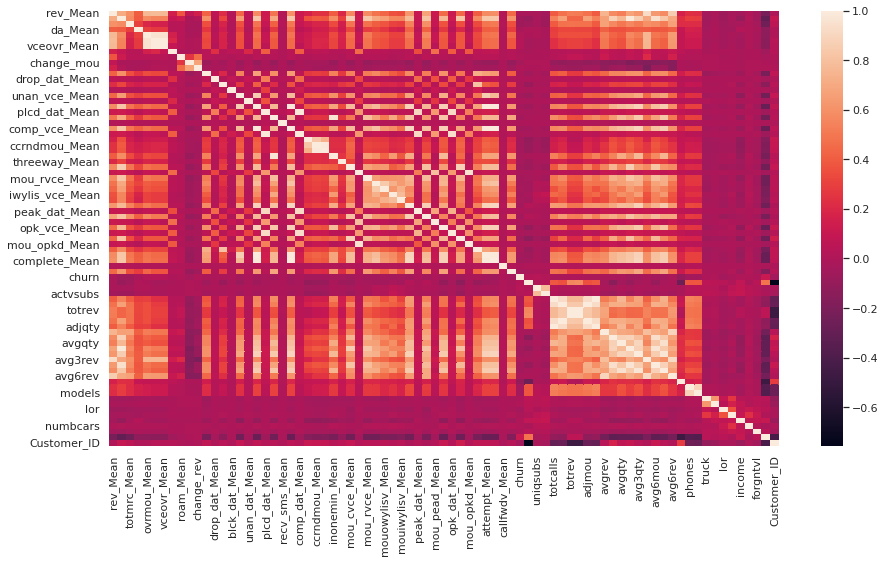

In [ ]:
sns.heatmap(df1.corr())

In [ ]:
df1.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [ ]:
client.head(10)

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
5,2,2,Y,C,N,26812,40869.00000,4033.98,3932.90,40295.00,...,0.0,U,U,U,U,U,U,Y,458.0,1000006
6,2,2,N,A,N,6279,17390.03333,3091.70,3065.24,17371.03,...,0.0,N,U,U,U,U,U,Y,852.0,1000007
7,1,1,Y,B,N,4491,12492.00000,1427.71,1423.06,12439.00,...,1.0,S,U,U,U,U,U,Y,231.0,1000008
8,1,1,Y,B,N,16730,43231.05333,4404.44,4313.71,42943.05,...,0.0,F,U,U,U,U,U,N,700.0,1000009
9,2,2,N,A,N,391,994.00000,1458.42,1457.84,976.00,...,1.0,N,U,U,U,U,U,Y,601.0,1000010


In [ ]:
#EDA
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import KFold

#KFold
Fold = 10
Verbose_eval = -1

X = df1.drop(['crclscod', 'area', 'dwlltype', 'dwllsize', 'churn','new_cell', 'asl_flag', 'prizm_social_one', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'marital', 'infobase', 'HHstatin', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'], axis=1)
y = df1['churn'] #目的変数

#パラメータ
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary', #目的
    'metric': {'auc'},
    'num_leaves': 20,
    'max_depth':5,
    'min_data_in_leaf': 3,
    'num_iteration': 100,
    'learning_rate':0.03,
    'num_boost_round': 100,
    'early_stopping_rounds':20,


}

valid_scores = []
models = []
kf = KFold(n_splits=Fold, shuffle=True, random_state=450)

for fold, (train_indices, valid_indices) in enumerate(kf.split(X)):
  #トレーニングデータ、テストデータの分割
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

  #学習に使用するデータを設定
  lgb_train = lgb.Dataset(X_train, y_train)
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

  #モデルの学習
  model = lgb.train(params, train_set=lgb_train, #トレーニングデータの指定
                    valid_sets=lgb_eval, #検証データの指定
                    verbose_eval=Verbose_eval
                    )
  
  y_pred = model.predict(X_valid)
  #ＡＵＣの計算
  fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred)
  auc = metrics.auc(fpr, tpr)
  valid_scores.append(auc)

  models.append(model)
  print('auc::', auc)

cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')



Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.67801
auc:: 0.67800952002998
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.67801
auc:: 0.67800952002998
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.67801
auc:: 0.67800952002998
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.67801
auc:: 0.67800952002998
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.67801
auc:: 0.67800952002998
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.67801
auc:: 0.67800952002998
Training until validation sc

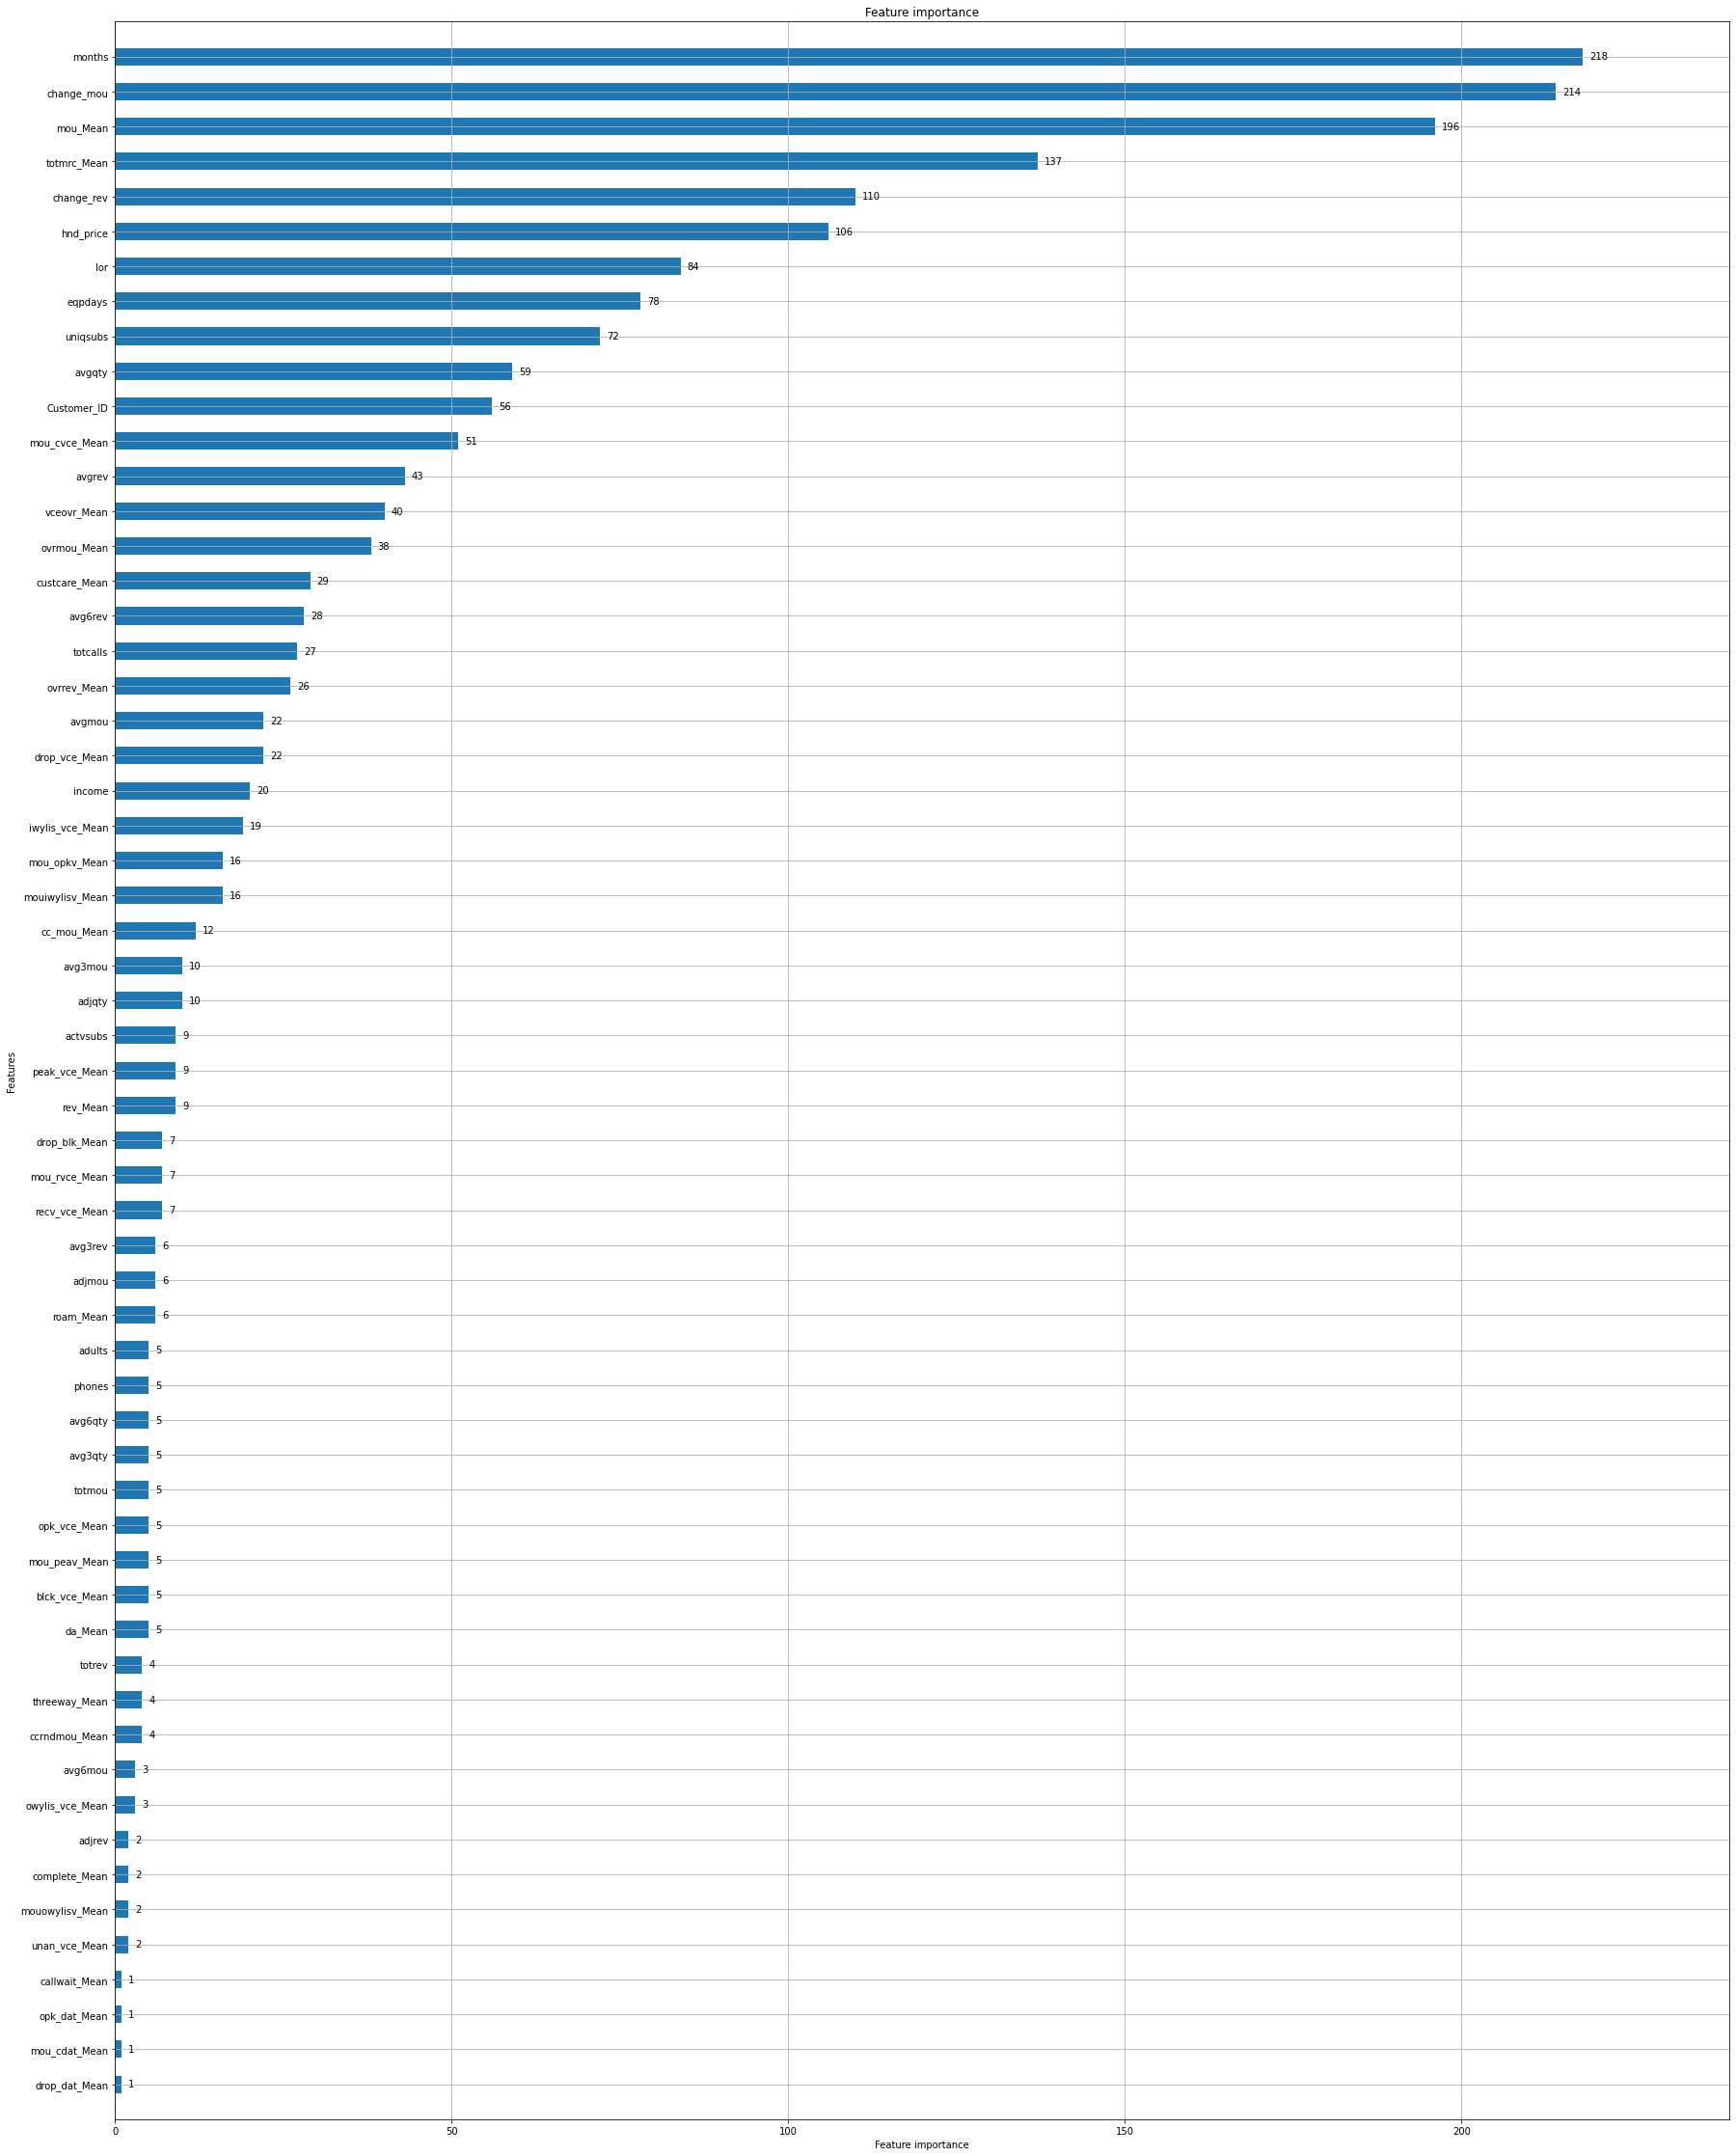

In [ ]:
lgb.plot_importance(model, height=0.5, figsize=(30,40))

In [ ]:
#monthについて検討
df1.groupby(["churn"])["months"].mean()

churn
0    18.633074
1    19.038457
Name: months, dtype: float64

In [ ]:
df1.groupby(["churn"])["months"].median()

churn
0    16.0
1    17.0
Name: months, dtype: float64

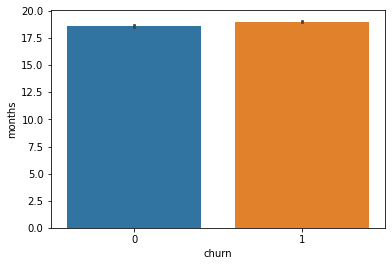

In [ ]:
sns.barplot(x='churn', y='months', data=df1)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: months, dtype: object

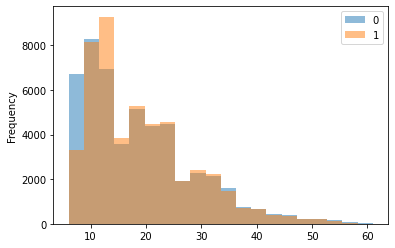

In [ ]:
df1.groupby('churn')['months'].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df1[df1["churn"]==1]["months"]
                , df1[df1["churn"]==0]["months"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
#change_mouについて
df1.groupby(["churn"])["change_mou"].mean()

churn
0    -5.344265
1   -22.759003
Name: change_mou, dtype: float64

In [ ]:
df1.groupby(["churn"])["change_mou"].median()

churn
0    -3.0
1   -10.0
Name: change_mou, dtype: float64

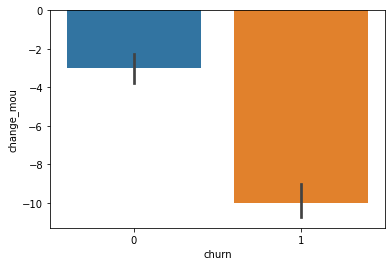

In [ ]:
sns.barplot(x='churn', y='change_mou', data=df1, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_mou, dtype: object

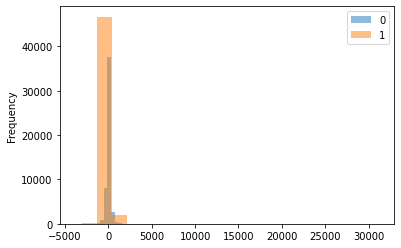

In [ ]:
df1.groupby(["churn"])["change_mou"].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
df1.isnull()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
99996,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
99997,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
99998,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df1[df1["churn"]==1]["mou_Mean"]
                , df1[df1["churn"]==0]["mou_Mean"]
                ,alternative='two-sided')
pvalue < 0.05

ValueError: ignored

In [ ]:
#mou_Mean

In [ ]:
df2 = df1

In [ ]:
df1

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [ ]:
df1.fillna(df1.median())

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0000,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1000,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0000,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0000,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0000,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,48.1950,355.50,44.990,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [ ]:
df1.groupby(["churn"])["months"].mean()

churn
0    18.633074
1    19.038457
Name: months, dtype: float64

In [ ]:
df1.groupby(["churn"])["months"].median()

churn
0    16.0
1    17.0
Name: months, dtype: float64

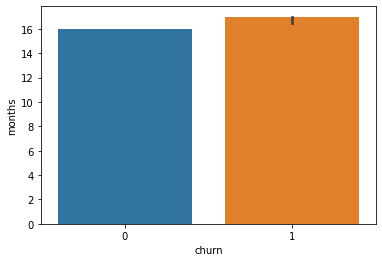

In [ ]:
sns.barplot(x='churn', y='months', data=df1, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: months, dtype: object

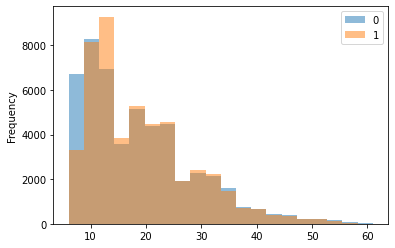

In [ ]:
df1.groupby('churn')['months'].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df1[df1["churn"]==1]["months"]
                , df1[df1["churn"]==0]["months"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり
解約した人の方が総使用時間が多い
↓
飽きが来ている?




In [ ]:
df2.groupby(["churn"])["change_mou"].mean()

churn
0    -5.348090
1   -22.533162
Name: change_mou, dtype: float64

In [ ]:
df2.groupby(["churn"])["change_mou"].median()

churn
0   -3.25
1   -8.75
Name: change_mou, dtype: float64

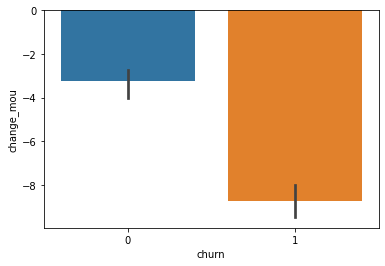

In [ ]:
sns.barplot(x='churn', y='change_mou', data=df2, estimator=np.median)

In [ ]:
df2[df2["change_mou"] < -4]['totmrc_Mean'].sum()

2413325.9049998354

In [ ]:
df2[df2["change_mou"] < -4]

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.50,0.2475,0.00,0.000,0.0000,0.000,0.0000,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
2,16.9900,10.25,16.99,0.0000,0.00,0.000,0.0000,0.000,0.0000,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
14,212.5150,1971.50,84.99,2.2275,249.50,99.800,99.8000,0.000,35.4975,-200.50,...,0.0,N,U,U,Y,U,U,Y,199.0,1000015
16,63.0175,440.25,59.98,0.0000,5.75,1.725,1.7250,0.000,1.3125,-16.25,...,0.0,N,U,U,U,U,U,Y,530.0,1000017
19,50.9650,162.00,69.99,0.0000,2.50,0.975,0.0000,0.975,0.0000,-58.00,...,0.0,S,U,U,Y,Y,Y,N,253.0,1000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,48.1950,355.50,44.99,0.2475,2.75,1.000,0.6825,0.000,0.0000,-6.25,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,48.1950,355.50,44.99,0.2475,2.75,1.000,0.6825,0.000,0.0000,-6.25,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,48.1950,355.50,44.99,0.2475,2.75,1.000,0.6825,0.000,0.0000,-6.25,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,48.1950,355.50,44.99,0.2475,2.75,1.000,0.6825,0.000,0.0000,-6.25,...,0.0,S,U,U,U,U,U,N,75.0,1099999


churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_mou, dtype: object

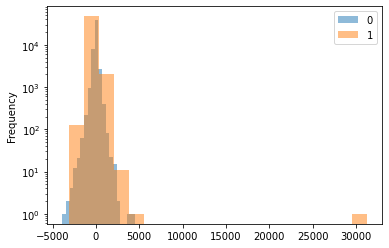

In [ ]:
df2.groupby(["churn"])["change_mou"].plot.hist(bins=20, alpha=0.5, log=True, legend=True)

In [ ]:
df2 = df1.fillna(df1.median())

In [ ]:
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["change_mou"]
                , df2[df2["churn"]==0]["change_mou"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり
解約した人は前3か月において解約しない人より月間使用時間が減っている

In [ ]:
df2.groupby('churn')['mou_Mean'].mean()

churn
0    542.790083
1    482.674631
Name: mou_Mean, dtype: float64

In [ ]:
df2.groupby('churn')['mou_Mean'].median()

churn
0    379.5
1    332.0
Name: mou_Mean, dtype: float64

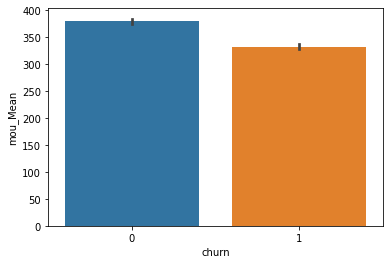

In [ ]:
sns.barplot(x='churn', y='mou_Mean', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mou_Mean, dtype: object

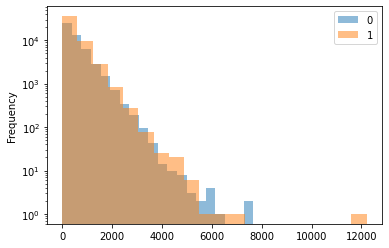

In [ ]:
df2.groupby('churn')['mou_Mean'].plot.hist(bins=20, alpha=0.5,log=True, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["mou_Mean"]
                , df2[df2["churn"]==0]["mou_Mean"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり
解約した人はそうでない人に比べて月間使用時間が少ない

In [ ]:
df2.groupby(["churn"])["totmrc_Mean"].mean()

churn
0    47.776178
1    44.545300
Name: totmrc_Mean, dtype: float64

In [ ]:
df2.groupby(["churn"])["totmrc_Mean"].median()

churn
0    44.9900
1    44.0575
Name: totmrc_Mean, dtype: float64

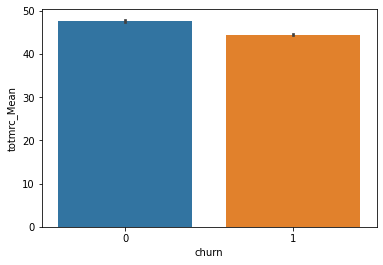

In [ ]:
sns.barplot(x='churn', y='totmrc_Mean', data=df2)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: totmrc_Mean, dtype: object

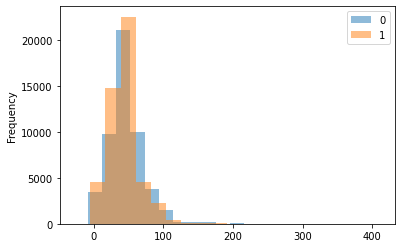

In [ ]:
df2.groupby('churn')['totmrc_Mean'].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["totmrc_Mean"]
                , df2[df2["churn"]==0]["totmrc_Mean"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
df2.groupby(["churn"])["change_rev"].mean()

churn
0   -1.405570
1   -0.617074
Name: change_rev, dtype: float64

In [ ]:
df2.groupby(["churn"])["change_rev"].median()

churn
0   -0.31375
1   -0.31500
Name: change_rev, dtype: float64

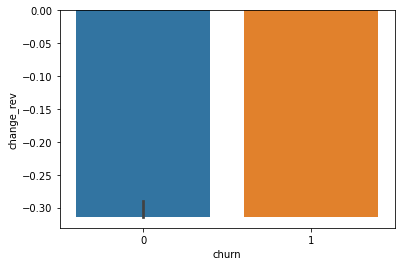

In [ ]:
sns.barplot(x='churn', y='change_rev', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_rev, dtype: object

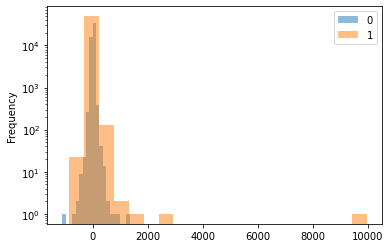

In [ ]:
df2.groupby('churn')['change_rev'].plot.hist(bins=20, alpha=0.5,log = True, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["change_rev"]
                , df2[df2["churn"]==0]["change_rev"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
df2.groupby(["churn"])["hnd_price"].mean()

churn
0    108.042847
1     95.567449
Name: hnd_price, dtype: float64

In [ ]:
df2.groupby(["churn"])["hnd_price"].median()

churn
0    129.98999
1     99.98999
Name: hnd_price, dtype: float64

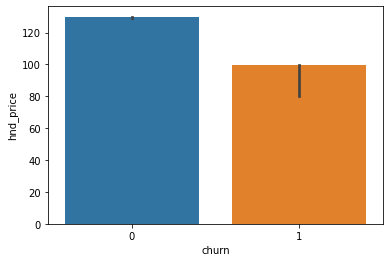

In [ ]:
sns.barplot(x='churn', y='hnd_price', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: hnd_price, dtype: object

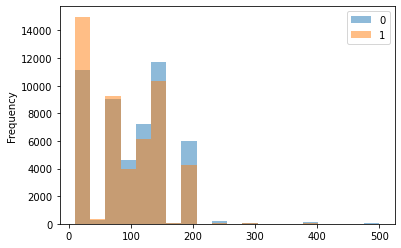

In [ ]:
df2.groupby('churn')['hnd_price'].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["hnd_price"]
                , df2[df2["churn"]==0]["hnd_price"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
df2.groupby(["churn"])["lor"].mean()

churn
0    5.980967
1    5.659881
Name: lor, dtype: float64

In [ ]:
df2.groupby(["churn"])["lor"].median()

churn
0    5.0
1    5.0
Name: lor, dtype: float64

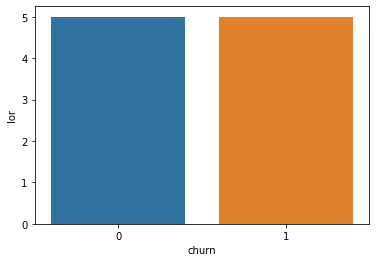

In [ ]:
sns.barplot(x='churn', y='lor', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lor, dtype: object

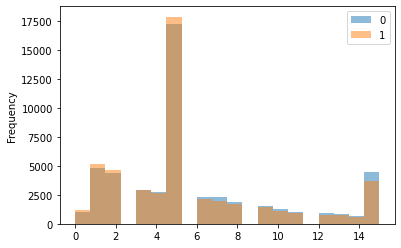

In [ ]:
df2.groupby('churn')['lor'].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["lor"]
                , df2[df2["churn"]==0]["lor"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
df2.groupby(["churn"])["eqpdays"].mean()

churn
0    363.280503
1    421.089524
Name: eqpdays, dtype: float64

In [ ]:
df2.groupby(["churn"])["eqpdays"].median()

churn
0    310.0
1    366.0
Name: eqpdays, dtype: float64

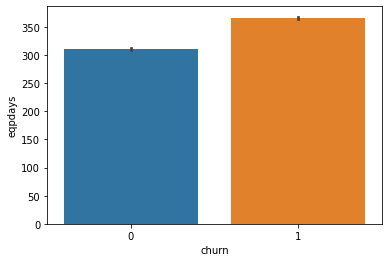

In [ ]:
sns.barplot(x='churn', y='eqpdays', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: eqpdays, dtype: object

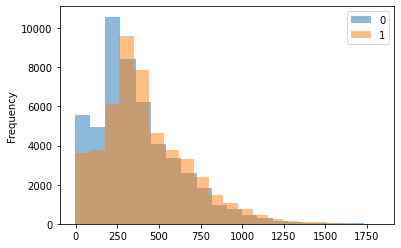

In [ ]:
df2.groupby('churn')['eqpdays'].plot.hist(bins=20, alpha=0.5, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["eqpdays"]
                , df2[df2["churn"]==0]["eqpdays"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
df2.groupby(["churn"])["uniqsubs"].mean()

churn
0    1.505631
1    1.591401
Name: uniqsubs, dtype: float64

In [ ]:
df2.groupby(["churn"])["uniqsubs"].median()

churn
0    1.0
1    1.0
Name: uniqsubs, dtype: float64

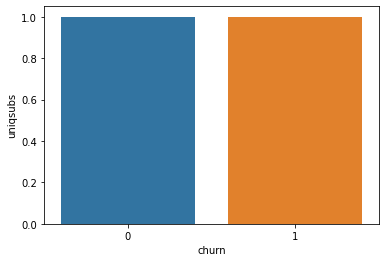

In [ ]:
sns.barplot(x='churn', y='uniqsubs', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: uniqsubs, dtype: object

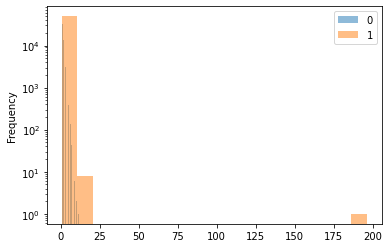

In [ ]:
df2.groupby('churn')['uniqsubs'].plot.hist(bins=20, alpha=0.5,log=True, legend=True)

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["uniqsubs"]
                , df2[df2["churn"]==0]["uniqsubs"]
                ,alternative='two-sided')
pvalue < 0.05

True

有意差あり

In [ ]:
df2.groupby(["churn"])["avgrev"].mean()

churn
0    58.228573
1    57.593527
Name: avgrev, dtype: float64

In [ ]:
df2.groupby(["churn"])["avgrev"].median()

churn
0    50.01
1    49.79
Name: avgrev, dtype: float64

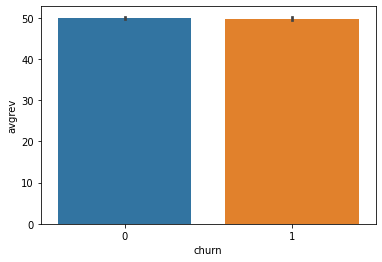

In [ ]:
sns.barplot(x='churn', y ='avgrev', data=df2, estimator=np.median)

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avgrev, dtype: object

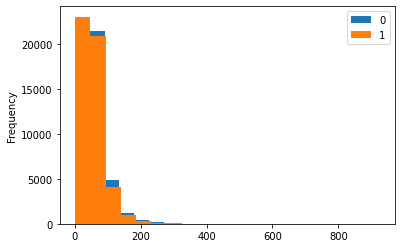

In [ ]:
df2.groupby('churn')['avgrev'].plot.hist(bins=20,  legend=True)

In [ ]:
s, pvalue = stats.mannwhitneyu(df2[df2["churn"]==1]["avgrev"]
                , df2[df2["churn"]==0]["avgrev"]
                ,alternative='two-sided')
pvalue < 0.05

False